<a href="https://colab.research.google.com/github/datanerddhanya/DATA602/blob/main/CPI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

As Inflation continues to rise, it has impacted our day to day spending.
It is important to know which categories have increased Consumer Goods Prices compared to others.This will provide some insight on price trends and spending patterns.

For this data analysis,i downloaded USA Consumer Price Index (CPI) data by expense category from Sep 2023 to Sep 2024 from Bureau of Labor Statistics and uploaded the same to my github account.
# https://www.bls.gov/cpi/



### **Data Exploration**
I am reading the csv file, creating dataframe, skipping the footnotes, generating the summary statistics, checking the missing values and further exploring the data.

Summary statistics means, medians, quartiles are displapyed using describe function:

Mean value is 257.979077

25% quartile is 153.885000

50% quartile is 232.318000

75% quartile is 329.140000


In [290]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Read raw data and skip footnotes in rows 388 to 407
cpi_expense_category = pd.read_csv('https://raw.githubusercontent.com/datanerddhanya/DATA602/refs/heads/main/cpi-u-202409.csv', skiprows=lambda x: 388 <= x <= 407)

# Display the number of rows and columns
print(cpi_expense_category.shape)

# names of columns, data type and number of missing values
cpi_expense_category.info()



# Display the summary statisticslike count, mean median
cpi_expense_category.describe()



(387, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Indent Level          382 non-null    float64
 1   Expenditure category  382 non-null    object 
 2   Sep.
2023             379 non-null    float64
 3   Oct.
2023             379 non-null    float64
 4   Nov.
2023             377 non-null    float64
 5   Dec.
2023             375 non-null    float64
 6   Jan.
2024             378 non-null    float64
 7   Feb.
2024             378 non-null    float64
 8   Mar.
2024             380 non-null    float64
 9   Apr.
2024             379 non-null    float64
 10  May.
2024             377 non-null    float64
 11  Jun.
2024             374 non-null    float64
 12  Jul.
2024             378 non-null    float64
 13  Aug.
2024             372 non-null    float64
 14  Sep.
2024             379 non-null    float64
dtypes: float64(14

,Indent Level,Sep.\n2023,Oct.\n2023,Nov.\n2023,Dec.\n2023,Jan.\n2024,Feb.\n2024,Mar.\n2024,Apr.\n2024,May.\n2024,Jun.\n2024,Jul.\n2024,Aug.\n2024,Sep.\n2024
count,382.000000,379.000000,379.000000,377.000000,375.000000,378.000000,378.000000,380.000000,379.000000,377.000000,374.000000,378.000000,372.000000,379.000000
mean,4.746073,255.144464,254.886306,253.642358,252.648291,254.383706,255.586788,256.719847,257.553673,257.505202,256.431278,257.146373,254.260226,257.979077
std,1.707148,162.979811,163.366973,164.447348,164.950996,165.610180,165.711851,166.444381,167.048331,168.687651,168.030574,167.989901,165.878737,169.262382
min,0.000000,1.129000,1.127000,1.088000,1.072000,1.094000,1.105000,1.084000,1.071000,1.075000,1.089000,1.086000,1.061000,1.066000
25%,4.000000,149.344000,151.095000,150.296000,149.750000,149.553750,151.998000,153.114500,153.489500,151.211000,150.705250,151.412750,152.512750,153.885000
50%,5.000000,228.787000,231.302000,228.951000,226.922000,231.089000,230.963500,231.767000,231.877000,231.933000,232.033000,232.659500,230.849000,232.318000
75%,6.000000,328.766000,323.613000,322.703000,316.926500,322.155250,319.725000,325.521750,325.880500,326.788000,326.989500,328.767000,324.294250,329.140000
max,8.000000,1443.712000,1471.019000,1487.792000,1486.900000,1491.538000,1502.976000,1509.166000,1509.890000,1534.064000,1541.460000,1543.823000,1562.042000,1562.356000


Missing value information

*   There are 5 blank rows in the dataset with nothing populated in rows and
columns.
*   Each month variable had missing values ranging from 8 to 15 of the them.
Two variables Indent and Expenditure category were improperly coded. Hence converted them to Integer and String respectively.


In [291]:
# Display the details on missing values
cpi_expense_category.isnull().sum()

,0
Indent Level,5
Expenditure category,5
Sep.\n2023,8
Oct.\n2023,8
Nov.\n2023,10
Dec.\n2023,12
Jan.\n2024,9
Feb.\n2024,9
Mar.\n2024,7
Apr.\n2024,8


### **Data Wrangling**






1.   Modify multiple column names.

Modified all time columns Sep. 2023 to Sep.2024 to remove \n in its column name



In [292]:
# Modify multiple column names to remove the new line \n
cpi_expense_category = cpi_expense_category.rename(columns=lambda x: x.replace('\n', ' '))
cpi_expense_category.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Indent Level          382 non-null    float64
 1   Expenditure category  382 non-null    object 
 2   Sep. 2023             379 non-null    float64
 3   Oct. 2023             379 non-null    float64
 4   Nov. 2023             377 non-null    float64
 5   Dec. 2023             375 non-null    float64
 6   Jan. 2024             378 non-null    float64
 7   Feb. 2024             378 non-null    float64
 8   Mar. 2024             380 non-null    float64
 9   Apr. 2024             379 non-null    float64
 10  May. 2024             377 non-null    float64
 11  Jun. 2024             374 non-null    float64
 12  Jul. 2024             378 non-null    float64
 13  Aug. 2024             372 non-null    float64
 14  Sep. 2024             379 non-null    float64
dtypes: float64(14), object(

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

Converted Indent Level to Integer and Expenditure Category columns to String

In [293]:
# Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.
cpi_expense_category['Indent Level'] = cpi_expense_category['Indent Level'].astype('Int64')  # Pandas nullable integer type that handles NaN
cpi_expense_category['Expenditure category'] = cpi_expense_category['Expenditure category'].astype('string')
cpi_expense_category.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Indent Level          382 non-null    Int64  
 1   Expenditure category  382 non-null    string 
 2   Sep. 2023             379 non-null    float64
 3   Oct. 2023             379 non-null    float64
 4   Nov. 2023             377 non-null    float64
 5   Dec. 2023             375 non-null    float64
 6   Jan. 2024             378 non-null    float64
 7   Feb. 2024             378 non-null    float64
 8   Mar. 2024             380 non-null    float64
 9   Apr. 2024             379 non-null    float64
 10  May. 2024             377 non-null    float64
 11  Jun. 2024             374 non-null    float64
 12  Jul. 2024             378 non-null    float64
 13  Aug. 2024             372 non-null    float64
 14  Sep. 2024             379 non-null    float64
dtypes: Int64(1), float64(13

3. Fix missing and invalid values in data.

Dropped all rows and columns containing entirely of NaN value in a dataframe.

Replaced missing values with 0

Checked again and validated that there are no more missing values

In [294]:
# Fix missing and invalid values in data.
# Drop all rows and columns containing entirely of NaN value in a dataframe
cleaned_cpi_expense_category = cpi_expense_category.dropna(how = 'all')
cleaned_cpi_expense_category.shape
# replace missing value with 0
fill_cleaned_cpi_expense_category = cleaned_cpi_expense_category.fillna(0)
fill_cleaned_cpi_expense_category .isnull().sum()



,0
Indent Level,0
Expenditure category,0
Sep. 2023,0
Oct. 2023,0
Nov. 2023,0
Dec. 2023,0
Jan. 2024,0
Feb. 2024,0
Mar. 2024,0
Apr. 2024,0


4. Create new columns based on existing columns or calculations.

Created Total column which is a mean of all columns Sep.2023 to Sep.2024

Validated that the column count increased

In [295]:

# Create new columns based on existing columns or calculations.
fill_cleaned_cpi_expense_category['Total'] = fill_cleaned_cpi_expense_category.iloc[:, 2:].mean(axis=1)
fill_cleaned_cpi_expense_category.head()
fill_cleaned_cpi_expense_category.shape



(382, 16)

5. Drop column(s) from your dataset.

Dropped the column 'Total' from the dataset and validated the same.

In [296]:

# Drop column(s) from your dataset.
fill_cleaned_cpi_expense_category.drop(columns='Total', inplace= True)
fill_cleaned_cpi_expense_category.head()



,Indent Level,Expenditure category,Sep. 2023,Oct. 2023,Nov. 2023,Dec. 2023,Jan. 2024,Feb. 2024,Mar. 2024,Apr. 2024,May. 2024,Jun. 2024,Jul. 2024,Aug. 2024,Sep. 2024
0,0,All items,307.789,307.671,307.051,306.746,308.417,310.326,312.332,313.548,314.069,314.175,314.540,314.796,315.301
1,1,Food,324.704,325.731,325.172,325.409,327.327,327.731,328.043,328.678,329.120,329.710,330.561,330.750,332.083
2,2,Food at home,303.925,304.788,303.224,303.005,305.037,305.469,305.426,305.707,305.679,305.752,306.643,306.402,307.767
3,3,Cereals and bakery products,355.576,355.752,356.169,353.844,354.532,356.633,354.666,355.852,356.758,356.938,356.525,355.652,356.088
4,4,Cereals and cereal products,287.999,286.804,286.694,283.027,283.917,286.959,284.879,289.964,288.543,286.565,287.230,286.276,286.139


6. Drop a row(s) from your dataset.

Dropped all rows in the data frame except the rows which have 'Indent Level' as 1.

In [297]:
# Drop a row(s) from your dataset.
fill_cleaned_cpi_expense_category_level1= fill_cleaned_cpi_expense_category[~((fill_cleaned_cpi_expense_category['Indent Level'] != 1))]
fill_cleaned_cpi_expense_category_level1.head()



,Indent Level,Expenditure category,Sep. 2023,Oct. 2023,Nov. 2023,Dec. 2023,Jan. 2024,Feb. 2024,Mar. 2024,Apr. 2024,May. 2024,Jun. 2024,Jul. 2024,Aug. 2024,Sep. 2024
1,1,Food,324.704,325.731,325.172,325.409,327.327,327.731,328.043,328.678,329.120,329.710,330.561,330.750,332.083
121,1,Energy,296.004,286.754,277.029,269.375,270.420,276.331,285.002,290.760,290.139,286.675,287.868,282.614,275.740
136,1,All items less food and energy,310.817,311.380,311.606,311.907,313.623,315.419,317.088,317.978,318.629,319.003,319.214,320.017,321.109
342,1,All items less food,305.162,304.877,304.249,303.866,305.500,307.628,309.882,311.182,311.714,311.750,312.042,312.308,312.692
343,1,All items less shelter,280.869,280.313,278.876,277.848,279.224,281.119,283.050,284.224,284.261,284.023,284.010,283.681,284.044


7. Sort your data based on multiple variables.

Sorted the data frame by variables: 'Sep. 2024','Aug. 2024'

In [298]:
# Sort your data based on multiple variables.
fill_cleaned_cpi_expense_category_level1= fill_cleaned_cpi_expense_category_level1.sort_values(['Sep. 2024','Aug. 2024'], ascending = [False, False])
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
print(fill_cleaned_cpi_expense_category_level1)


     Indent Level                               Expenditure category  Sep. 2023  Oct. 2023  Nov. 2023  Dec. 2023  Jan. 2024  Feb. 2024  Mar. 2024  Apr. 2024  May. 2024  Jun. 2024  Jul. 2024  Aug. 2024  Sep. 2024
378             1                                       Medical care    548.431    549.762    551.769    553.485    557.215    557.236    559.935    561.612    564.249    565.301    564.039    564.407    566.266
384             1                           Other goods and services    543.350    546.825    547.960    546.784    551.140    551.150    553.666    556.486    556.772    559.708    560.655    561.561    562.638
374             1                                     Other services    407.114    407.271    407.515    409.266    411.301    412.674    413.562    414.998    414.873    415.335    416.412    417.480    417.567
353             1                                           Services    388.274    389.278    390.873    392.042    395.020    397.225    399.752    401

8. Filter your data based on some condition.

Filtered the data set to remove the records where the 'Expenditure category' variable has values that starts with 'All items'

In [299]:
# Filter your data based on some condition.
fill_cleaned_cpi_expense_category_level1 = fill_cleaned_cpi_expense_category_level1[~fill_cleaned_cpi_expense_category_level1['Expenditure category'].str.startswith('All items')]

print(fill_cleaned_cpi_expense_category_level1)



     Indent Level                  Expenditure category  Sep. 2023  Oct. 2023  Nov. 2023  Dec. 2023  Jan. 2024  Feb. 2024  Mar. 2024  Apr. 2024  May. 2024  Jun. 2024  Jul. 2024  Aug. 2024  Sep. 2024
378             1                          Medical care    548.431    549.762    551.769    553.485    557.215    557.236    559.935    561.612    564.249    565.301    564.039    564.407    566.266
384             1              Other goods and services    543.350    546.825    547.960    546.784    551.140    551.150    553.666    556.486    556.772    559.708    560.655    561.561    562.638
374             1                        Other services    407.114    407.271    407.515    409.266    411.301    412.674    413.562    414.998    414.873    415.335    416.412    417.480    417.567
353             1                              Services    388.274    389.278    390.873    392.042    395.020    397.225    399.752    401.020    402.200    403.242    404.026    405.074    406.433
362  

9. Convert all the string values to upper or lower cases in one column.

Converted the values in 'Expenditure category' variable to lower case.

In [300]:
# Convert all the string values to upper or lower cases in one column.
fill_cleaned_cpi_expense_category_level1['Expenditure category'] = fill_cleaned_cpi_expense_category_level1['Expenditure category'].str.lower()
print(fill_cleaned_cpi_expense_category_level1)



     Indent Level                  Expenditure category  Sep. 2023  Oct. 2023  Nov. 2023  Dec. 2023  Jan. 2024  Feb. 2024  Mar. 2024  Apr. 2024  May. 2024  Jun. 2024  Jul. 2024  Aug. 2024  Sep. 2024
378             1                          medical care    548.431    549.762    551.769    553.485    557.215    557.236    559.935    561.612    564.249    565.301    564.039    564.407    566.266
384             1              other goods and services    543.350    546.825    547.960    546.784    551.140    551.150    553.666    556.486    556.772    559.708    560.655    561.561    562.638
374             1                        other services    407.114    407.271    407.515    409.266    411.301    412.674    413.562    414.998    414.873    415.335    416.412    417.480    417.567
353             1                              services    388.274    389.278    390.873    392.042    395.020    397.225    399.752    401.020    402.200    403.242    404.026    405.074    406.433
362  

10. Check whether numeric values are present in a given column of your dataframe.

Validated if the 'Indent Level'  variable is numeric and it retured True.

In [301]:
# Check whether numeric values are present in a given column of your dataframe.

is_numeric = pd.api.types.is_numeric_dtype(fill_cleaned_cpi_expense_category_level1['Indent Level'])
print(is_numeric)



True


11. Group your dataset by one column, and get the mean, min, and max values by group.

Grouped the data frame by 'Expenditure category' and received mean, min, and max by each 'Expenditure category'.

In [302]:
# Group your dataset by one column, and get the mean, min, and max values by group.

# First i need to pivot long to move the time columns into rows
fill_cleaned_cpi_expense_category_level1_pivot= fill_cleaned_cpi_expense_category_level1.melt(id_vars=['Indent Level', 'Expenditure category'],
                  var_name='Time',
                  value_name='CPIValue')

# Convert 'CPIValue' to numeric, handling errors
fill_cleaned_cpi_expense_category_level1_pivot['CPIValue'] = pd.to_numeric(fill_cleaned_cpi_expense_category_level1_pivot['CPIValue'], errors='coerce')

# Convert Time to String
fill_cleaned_cpi_expense_category_level1_pivot['Time'] = fill_cleaned_cpi_expense_category_level1_pivot['Time'].astype(str)

# Group by 'Expenditure category' and calculate the mean of 'CPIValue'
grouped_data_mean = fill_cleaned_cpi_expense_category_level1_pivot.groupby(['Expenditure category'])['CPIValue'].mean()

# Group by 'Expenditure category' and calculate the mean of 'CPIValue'
grouped_data_max = fill_cleaned_cpi_expense_category_level1_pivot.groupby(['Expenditure category'])['CPIValue'].max()

# Group by 'Expenditure category' and calculate the mean of 'CPIValue'
grouped_data_min = fill_cleaned_cpi_expense_category_level1_pivot.groupby(['Expenditure category'])['CPIValue'].min()

print("\n**Mean values**")
print(grouped_data_mean)
print("\n**Max values**")
print(grouped_data_max)
print("\n**Min values**")
print(grouped_data_min)


**Mean values**
Expenditure category
apparel less footwear                   123.171385
commodities                             223.352000
durables                                123.671308
education and communication(5)          145.789000
energy                                  282.670077
food                                    328.078385
food and beverages                      325.533462
fuels and utilities                     311.847308
household furnishings and operations    147.630077
housing                                 330.260769
medical care                            558.746692
nondurables                             276.755692
other goods and services                553.745769
other services                          412.720615
recreation(5)                           137.662154
services                                398.035308
transportation                          270.415154
utilities and public transportation     257.443846
Name: CPIValue, dtype: float64

**Max values

12. Group your dataset by two columns and then sort the aggregated results within the groups.

Grouped the data frame by 'Expenditure category','Time'  and then sorted the grouped result.


In [303]:
# Groupby()
# agg() or .apply()
# Group your dataset by two columns and then sort the aggregated results within the groups.

# Group by 'Expenditure category' and 'Time' and calculate the mean of 'CPIValue'
grouped_data = fill_cleaned_cpi_expense_category_level1_pivot.groupby(['Expenditure category','Time'])['CPIValue'].mean()

grouped_data_df = grouped_data.to_frame()
# Sort the results by 'CPIValue' in descending order
grouped_data_df.sort_values(by="CPIValue", ascending= False)



CPIValue
Expenditure category  Time               
medical care          Sep. 2024   566.266
                      Jun. 2024   565.301
                      Aug. 2024   564.407
                      May. 2024   564.249
                      Jul. 2024   564.039
...                                   ...
durables              Aug. 2024   122.201
apparel less footwear Jul. 2024   121.268
                      Jan. 2024   119.886
                      Nov. 2023   119.489
                      Dec. 2023   117.348

[234 rows x 1 columns]

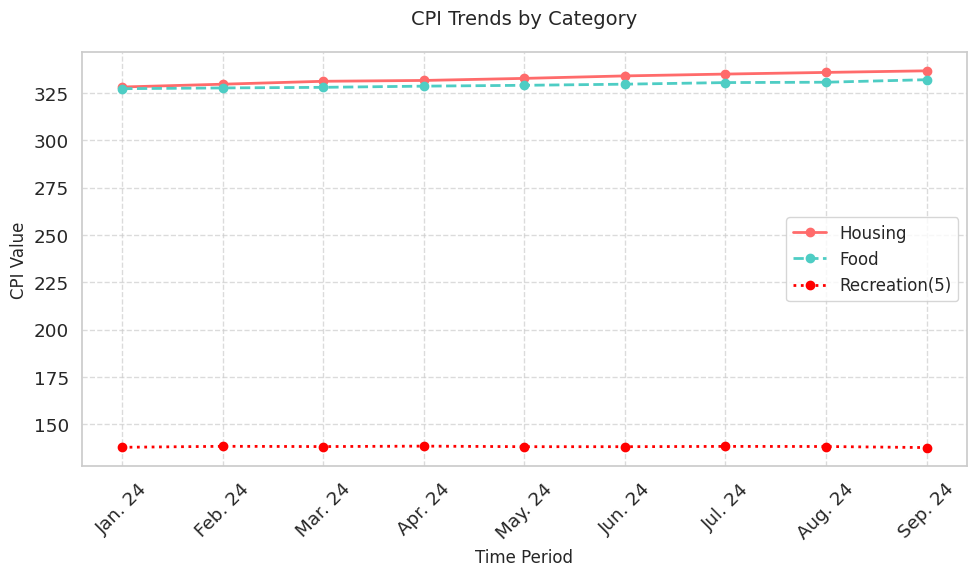

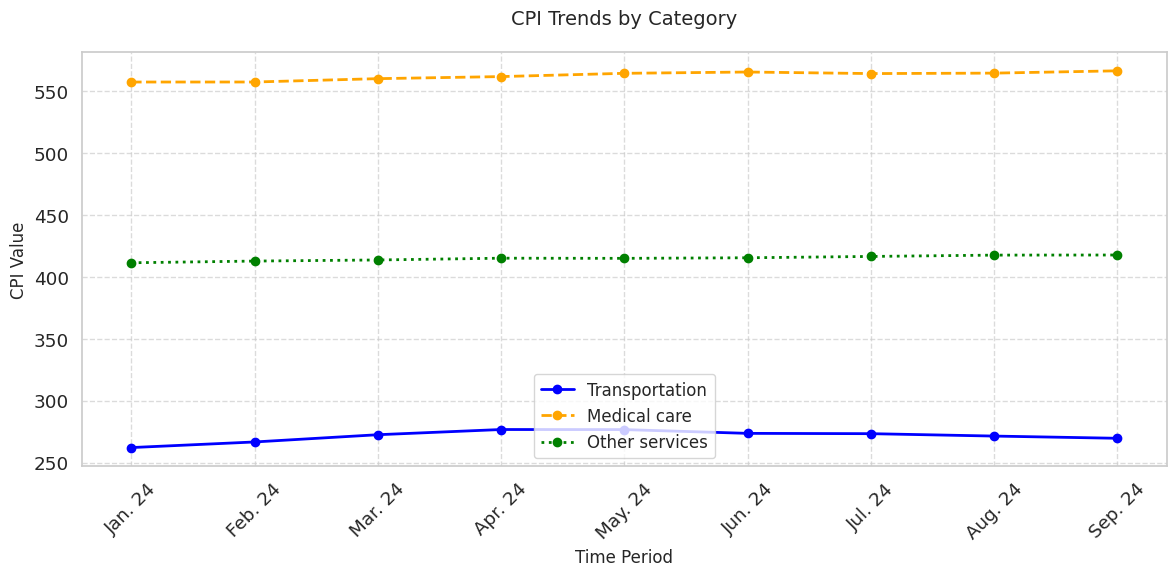

In [304]:


import matplotlib.pyplot as plt

# Create a month order dictionary for sorting
month_order = {
    'Jan.': 1, 'Feb.': 2, 'Mar.': 3, 'Apr.': 4, 'May.': 5, 'Jun.': 6,
    'Jul.': 7, 'Aug.': 8, 'Sep.': 9, 'Oct.': 10, 'Nov.': 11, 'Dec.': 12
}

# Function to sort the time values
def sort_time(time_series):
    return sorted(time_series, key=lambda x: month_order[x.split()[0]])

# First Plot - Multiple Categories
plt.figure(figsize=(10, 6))
categories = ['housing', 'food', 'recreation(5)']
colors = ['#FF6B6B', '#4ECDC4', 'red']
linestyles = ['-', '--', ':']

# Convered the grouped series to a data frame.
grouped_data_df = grouped_data_df.reset_index()
# replace time values having 2024 to 24
grouped_data_df['Time'] = grouped_data_df['Time'].str.replace('20', '')
# fitered the data frame only for 2024 data
grouped_data_df = grouped_data_df[grouped_data_df['Time'].str.contains('24')]


for cat, color, style in zip(categories, colors, linestyles):
    cat_data = grouped_data_df[grouped_data_df['Expenditure category'] == cat]
    cat_data = cat_data.set_index('Time').reindex(sort_time(cat_data['Time'].unique())).reset_index()
    plt.plot(cat_data['Time'], cat_data['CPIValue'],
            label=cat.capitalize(),
            color=color,
            linestyle=style,
            linewidth=2,
            marker='o')

plt.title('CPI Trends by Category', fontsize=14, pad=20)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize= 12)
plt.tight_layout()
plt.show()

# Second Plot - Other expense categories
plt.figure(figsize=(12, 6))
categories = ['transportation', 'medical care', 'other services']
colors = ['blue', 'orange', 'green']
linestyles = ['-', '--', ':']

for cat, color, style in zip(categories, colors, linestyles):
    cat_data = grouped_data_df[grouped_data_df['Expenditure category'] == cat]
    cat_data = cat_data.set_index('Time').reindex(sort_time(cat_data['Time'].unique())).reset_index()
    plt.plot(cat_data['Time'], cat_data['CPIValue'],
            label=cat.capitalize(),
            color=color,
            linestyle=style,
            linewidth=2,
            marker='o')

plt.title('CPI Trends by Category', fontsize=14, pad=20)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize= 12)
plt.tight_layout()
plt.show()

Using matplotlib, i am incorporating  the following  changes to the properties:

Change a legend position

Change a legend font size

Place a legend outside of the plot

Create a single legend for all subplots

Change the title and x/y labels

Change the marker, line colors, and line width

Add annotations

Modify Axis Text Ticks/Labels

Change size of axis Labels

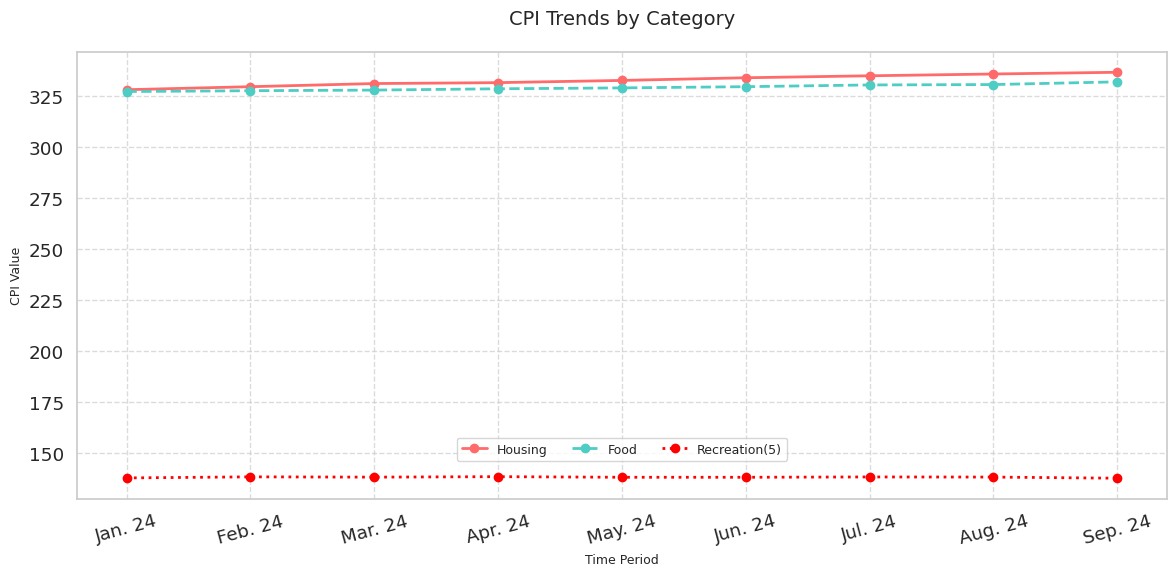

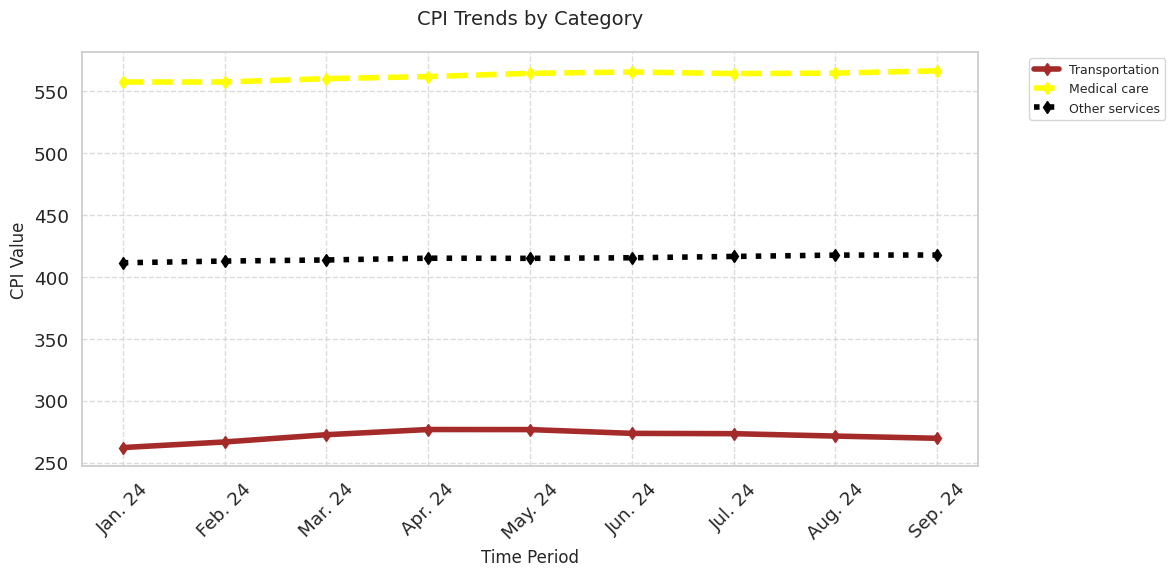

In [305]:


import matplotlib.pyplot as plt

# Create a month order dictionary for sorting
month_order = {
    'Jan.': 1, 'Feb.': 2, 'Mar.': 3, 'Apr.': 4, 'May.': 5, 'Jun.': 6,
    'Jul.': 7, 'Aug.': 8, 'Sep.': 9, 'Oct.': 10, 'Nov.': 11, 'Dec.': 12
}

# Function to sort the time values
def sort_time(time_series):
    return sorted(time_series, key=lambda x: month_order[x.split()[0]])

# First Plot - Multiple Categories
plt.figure(figsize=(12, 6))
categories = ['housing', 'food', 'recreation(5)']
colors = ['#FF6B6B', '#4ECDC4', 'red']
linestyles = ['-', '--', ':']

for cat, color, style in zip(categories, colors, linestyles):
    cat_data = grouped_data_df[grouped_data_df['Expenditure category'] == cat]
    cat_data = cat_data.set_index('Time').reindex(sort_time(cat_data['Time'].unique())).reset_index()
    plt.plot(cat_data['Time'], cat_data['CPIValue'],
            label=cat.capitalize(),
            color=color,
            linestyle=style,
            linewidth=2,
            marker='o')

plt.title('CPI Trends by Category', fontsize=14, pad=20)

# Changed size of axis Labels
plt.xlabel('Time Period', fontsize=9)
plt.ylabel('CPI Value', fontsize=9)
# Modified Axis Text Ticks
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.7)
# Changed the legend position
# Changed the font size
plt.legend(fontsize= 9,bbox_to_anchor=(0.5, 0.15), loc='upper center', ncol=3)
plt.tight_layout()
plt.show()

# Second Plot - Other expense categories
plt.figure(figsize=(12, 6))
categories2 = ['transportation', 'medical care', 'other services']

# Changed the line colors
colors2 = ['brown', 'yellow', 'black']

linestyles = ['-', '--', ':']

for cat, color, style in zip(categories2, colors2, linestyles):
    cat_data = grouped_data_df[grouped_data_df['Expenditure category'] == cat]
    cat_data = cat_data.set_index('Time').reindex(sort_time(cat_data['Time'].unique())).reset_index()
# Changed the marker and line width
    plt.plot(cat_data['Time'], cat_data['CPIValue'],
            label=cat.capitalize(),
            color=color,
            linestyle=style,
            linewidth=4,
            marker='d')

plt.title('CPI Trends by Category', fontsize=14, pad=20)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('CPI Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
# Changed the legend position outside
plt.legend(fontsize= 9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

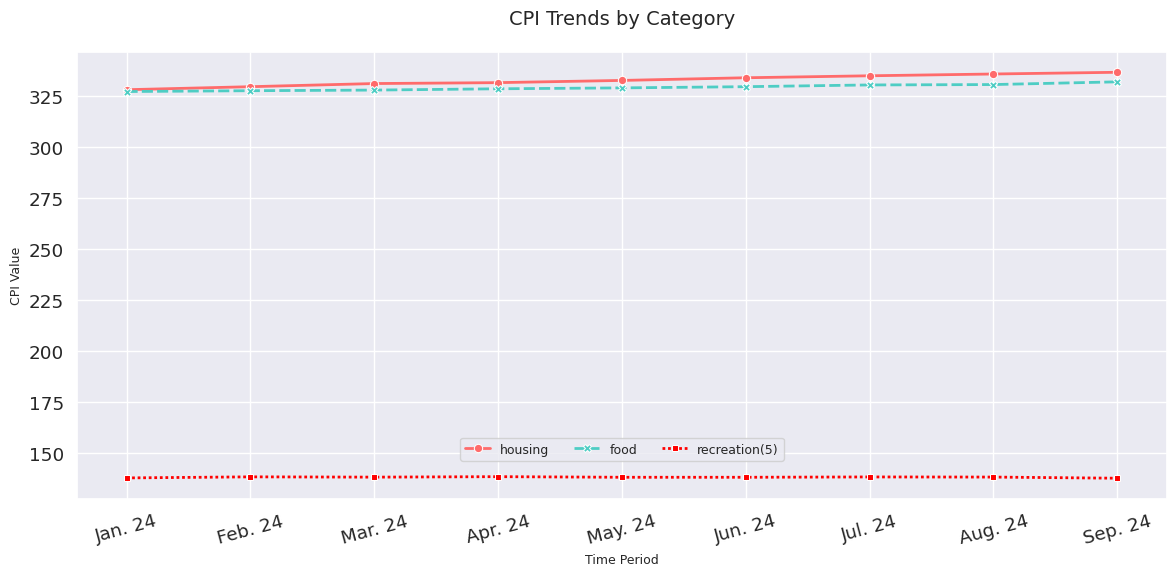

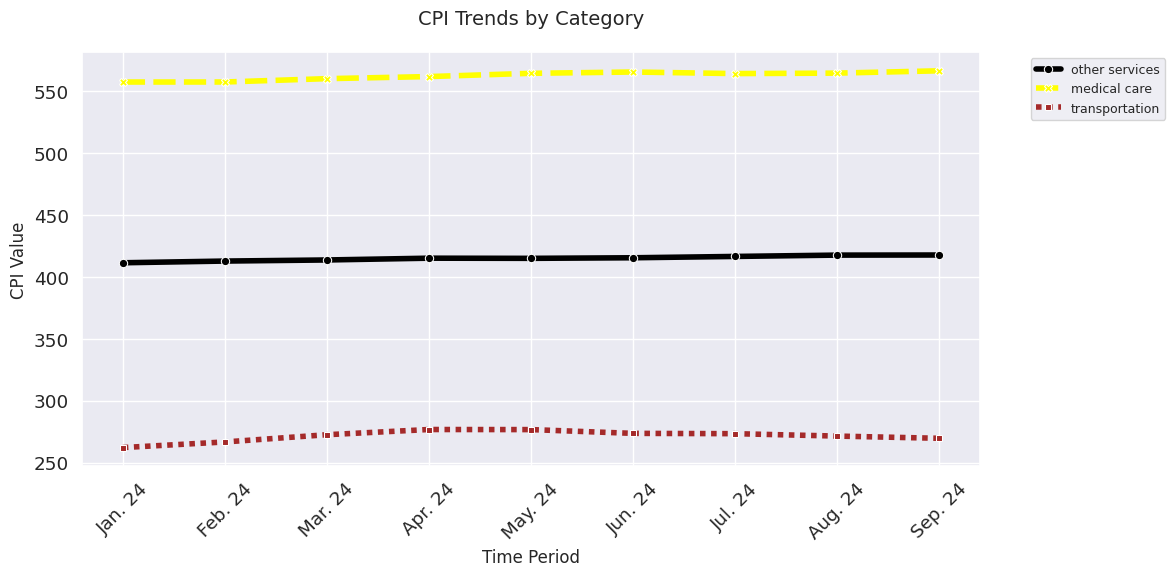

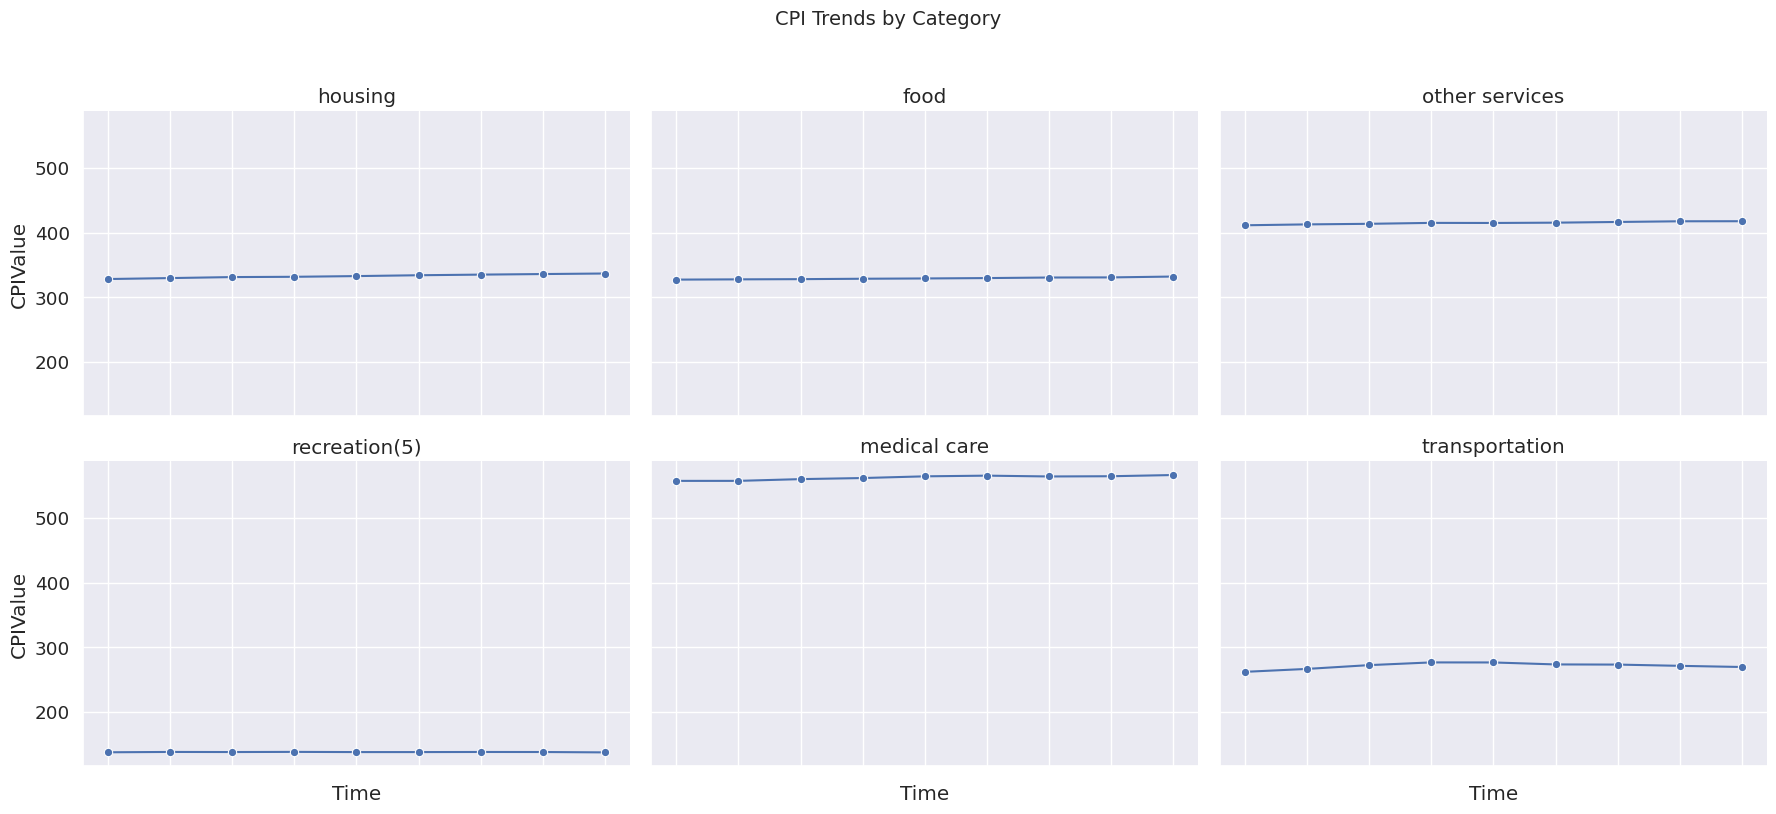

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a month order dictionary for sorting
month_order = {
    'Jan.': 1, 'Feb.': 2, 'Mar.': 3, 'Apr.': 4, 'May.': 5, 'Jun.': 6,
    'Jul.': 7, 'Aug.': 8, 'Sep.': 9, 'Oct.': 10, 'Nov.': 11, 'Dec.': 12
}

# Set the Seaborn style and context
# Key Difference 1: Seaborn provides built-in themes for consistent styling
sns.set_style("darkgrid") #modern styling
sns.set_context("notebook", font_scale=1.2)

# Create a copy of the dataframe and sort it
sorted_df = grouped_data_df.copy()
sorted_df['sort_order'] = sorted_df['Time'].map(lambda x: month_order[x.split()[0]])
sorted_df = sorted_df.sort_values('sort_order')

grouped_data_df = sorted_df.copy()

# First Plot - Multiple Categories
# Key Difference 2: Seaborn works better with "long-format" data
categories = ['housing', 'food', 'recreation(5)']
colors = ['#FF6B6B', '#4ECDC4', 'red']

# Create figure with larger size
plt.figure(figsize=(12, 6))

# Key Difference 3: Using Seaborn's lineplot instead of plt.plot
# Seaborn automatically handles different line styles and markers
first_plot = sns.lineplot(
    data=grouped_data_df[grouped_data_df['Expenditure category'].isin(categories)],
    x='Time',
    y='CPIValue',
    hue='Expenditure category',
    style='Expenditure category',
    markers=True,
    dashes=True,
    palette=dict(zip(categories, colors)),
    linewidth=2
)

# Customize the plot
first_plot.set_title('CPI Trends by Category', pad=20, fontsize=14)
first_plot.set_xlabel('Time Period', fontsize=9)
first_plot.set_ylabel('CPI Value', fontsize=9)
plt.xticks(rotation=15)

# Key Difference 4: Legend handling is more streamlined in Seaborn
plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.15),
          loc='upper center', ncol=3)
plt.tight_layout()
plt.show()

# Second Plot - Other expense categories
categories2 = ['transportation', 'medical care', 'other services']
colors2 = ['brown', 'yellow', 'black']

plt.figure(figsize=(12, 6))

# Key Difference 5: Consistent API for multiple plots
second_plot = sns.lineplot(
    data=grouped_data_df[grouped_data_df['Expenditure category'].isin(categories2)],
    x='Time',
    y='CPIValue',
    hue='Expenditure category',
    style='Expenditure category',
    markers=True,
    dashes=True,
    palette=dict(zip(categories2, colors2)),
    linewidth=4,
    marker='d'
)

# Customize the second plot
second_plot.set_title('CPI Trends by Category', pad=20, fontsize=14)
second_plot.set_xlabel('Time Period', fontsize=12)
second_plot.set_ylabel('CPI Value', fontsize=12)
plt.xticks(rotation=45)

# Move legend outside
plt.legend(fontsize=9, bbox_to_anchor=(1.05, 1),
          loc='upper left')
plt.tight_layout()
plt.show()

# Alternative approach using FacetGrid
# Key Difference 6: Seaborn's FacetGrid for multiple related plots
# This creates both plots in a single figure
categories_all = categories + categories2
colors_all = colors + colors2

g = sns.FacetGrid(
    data=grouped_data_df[grouped_data_df['Expenditure category'].isin(categories_all)],
    col='Expenditure category',
    col_wrap=3,
    height=4,
    aspect=1.5
)

g.map_dataframe(
    sns.lineplot,
    x='Time',
    y='CPIValue',
    marker='o'
)

g.fig.suptitle('CPI Trends by Category', y=1.02, fontsize=14)
g.set_titles(col_template='{col_name}')
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

Based on your the  plots, the key differences between creating a plot in matplotlib and seaborn are:

1. Seaborn provides built-in themes and styling options.
2. Seaborn works better with "long-format" data, hence less data manipualtion required and more intuitive handling of categorical variables.
3.Simplified plotting with lineplot instead of multiple plt.plot calls. Also automatic handling of different line styles and markers.
4.Legend handling is more streamlined in Seaborn.
5. Added FacetGrid example showing Seaborn's powerful faceting capabilities and more options for statistical visualization.


# **Conclusions**


Based on the exploratory data analysis of the Consumer Price Index for the months Sept 2024 to Sep 2023, i observe the following details:

*   The data has 387 rows, 15 variables. The variables are Indent Level, Expenditure Category and months in each column.
*   Based on the summary statistics, Sep 2024 has a CPI mean of 257.979077 with min value of  1.066000 and max value of 1562.356000.
*   There are 5 blank rows in the dataset with nothing populated in rows and columns.
*   Each month variable had missing values ranging from 8 to 15 of the them.
Two variables Indent and Expenditure category were improperly coded. Hence converted them to Integer and String respectively.
*   To fix the missing values, i deleted all rows containing only NaN value and columns having NaN replaced them with O.
*   By sorting the data by Expenditure category, i observe that   Medical care  is the highest expense category.
*   After grouping the data by Expense Category and Time, hightest increase from Sep 2023 to Sep 2024 is in medical care, followed by other goods and services.
*  Plotted visualizations using Matloblib and Seaborn.
*   The CPI trend by Housing, Food and Recreation showed that as Housing and Food CPI values increased, the CPI value for recreation remain the same.
*   The CPI trend by Medical, Transportation and other services indicates that they all almost increased by the same margin.













